# 회귀분석

기초통계이론, 선형회귀, 중회귀

- 배운 내용정리

In [6]:
library('tidyverse')

## 1. 기초통계이론

### 1.1) 도입

In [2]:
ex1 <- tribble(
    ~x, ~y,
    1, 150,
    2, 160,
    3, 170,
    4, 150,
    5, 140,
    6, 160,
    7, 190
    )

In [3]:
ex1

x,y
<dbl>,<dbl>
1,150
2,160
3,170
4,150
5,140
6,160
7,190


1) histplot

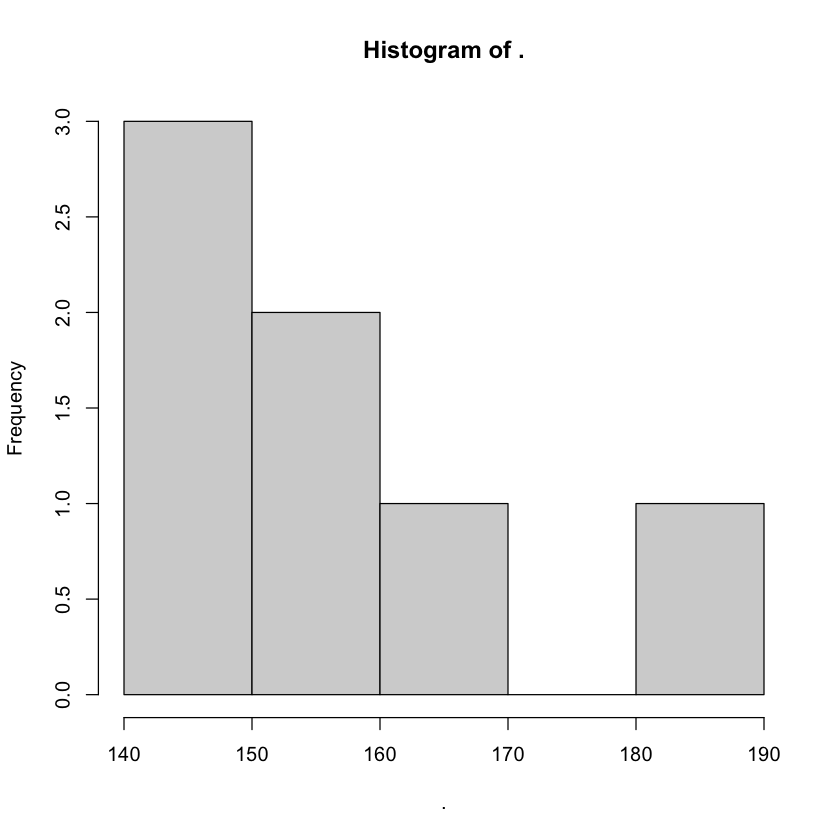

In [4]:
ex1$y %>% hist()

- 히스토그램은 계급 구간의 수가 중요하다(보통 10개 내외 사용)

2) boxplot

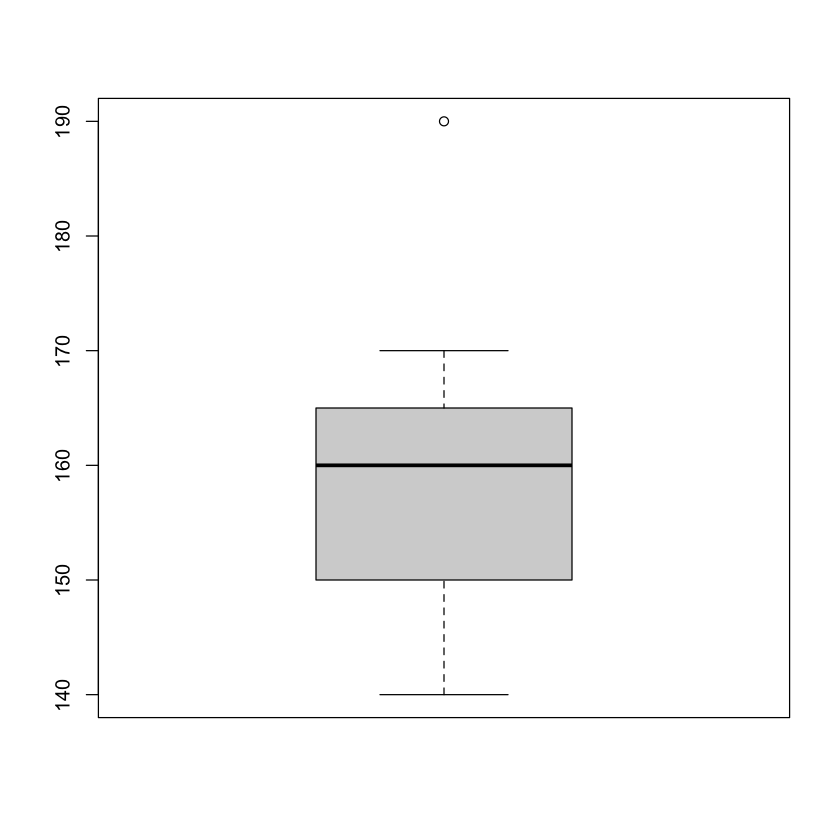

In [5]:
ex1$y %>% boxplot()

맨 위아래 가로바 밖은 이상치(outlier)들<br>
박스 맨 아래는 Q1, 가운데 선은 Q2(평균), 박스 맨 위는 Q3를 의미한다.<br>
이 때 Q3-Q1 = h라고 하며 맨 위의 가로바, 맨 아래의 가로바는 각각 Q3 + 1.5h, Q1 - 1.5h인 지점이다.

### 1.2) 기본적 측도를 나타내는 것들

모수(parameter) : 모집단이나 변수의 통계적 특성을 어떤 수치로 표현한 것<br>
모수의 예로는 모집단의 중심위치를 나타내는 평균, 중간값, 최빈값과<br>
값들이 중심에서 퍼져있는 정도, 즉 산포도를 나타내는 범위, 편차, 표준편차, 분산등이 있다.<br>
이들 모수의 값은 대부분의 경우 알려져 있지 않으므로 표본을 이용하여 이들 값을 추정하게 된다.<br>
<br>
통계랑(statisic) : 모수에 대응하여 표본의 특성을 잘 나타내는 수치<br>
통계량은 표본을 이용하여 계산되므로 각 모수에다 '표본'을 붙여 통계량을 나타낸다.ex) 표본 평균, 표본 분산<br>
두 개 이상의 변수들의 관계에 대한 측도로는 공분산과 상관계수 등이 사용된다.

### 1.3) 확률변수와 확률표본

확률변수(random variable) : 분석대상인 변수들이 갖는 각 결과에 하나의 실수값을 대응시켜주는 함수<br>
확률(random)의 의미 : 확률변수의 값은 실제로 관측하기 전에는 어떠한 값이 될지 알 수 없다<br>
확률분포(probability distribution) : 확률변수의 모든 가능한 값에 확률을 대응시킨 것<br>
확률분포는 이산확률변수의 경우 표, 그림, 수식으로 나타내어지고, 연속확률변수의 경우 그림, 수식으로 주어진다.

#### 기댓값과 분산

$E[Y] = \sum\limits_{i=1}^d{y_if_Y(y_i)}$

기댓값은 다음과 같이 정의 되는데<br>
위의 의미는 이산확률변수 Y의 기댓값은 $f_y(y_i)$가 `가중치`로 주어지는 가중평균이라는 것이다.

#### 공분산과 상관계수

공분산(covariance)는 두 변수간의 선형관계를 나타내는 측도로 다음과 같이 정의된다.

$cov(Y_1, Y_2) = E[(Y_1 - \mu Y_1)(Y_2 - \mu Y_2)]$

#### 모집단 상관계수

$\rho = \frac{cov(Y_1, Y_2)}{\sigma Y1, \sigma Y2}$

상관계수 $\rho$는 다음과 같이 해석된다.<br>
> 1) $\rho$는 변수의 종류나 특정단위에 관계없는 측도로 -1과 +1 사이의 값을 가지며, $\rho$의 값이 +1에 가까울수록 강한 양의 상관관계를,<br>-1에 가까울수록 강한 음의 상관관계를 나타내며, $\rho$의 값이 0에 가까울수록 선형관계는 약해진다.<br>
 2) $Y_1$과 $Y_2$의 대응되는 모든 값들이 한 직선 상에 위치하면 $\rho$의 값은 -1이나 +1의 값을 가진다.<br>
 3) 상관계수 $\rho$는 단지 두 변수간의 선형관계만을 나타내는 측도이다. 그러므로 $\rho$ = 0인 경우에 두 변수의 선형상관관계는 없지만 다른 관계는 가질 수 있다.

#### 이산확률분포

여러가지 이산확률분포들 중에서 회귀분석과 관련이 있는 분포는 이항분포(binomial distribution)와 포아송분포(poisson distribution)이다.<br>
먼저 이항분포는 베르누이 시행(bernoulli trial)에 의해 정의되는데, 어느 실험이<br> 1) 오직 두 가지의 가능한 결과만을 가지고,<br> 2) 매 번 시행에서 성공의 확률이 같아야 하며,<br>
3) 각 시행은 서로 독립이라는 세 가지 조건을 만족하면 이를 베르누이 시행이라 한다.

동전던지기(앞 or 뒤), 품질검사(양품 or 불량품)가 이에 해당한다.<br>
보통 일반적으로 베르누이 시행의 결과를 성공과 실패로 나타낸다.

이항분포 : 베르누이 시행을 독립적으로 n번 반복할 때 나타나는 성공의 개수가 갖는 확률분포

포아송분포 : 단위 시간당 또는 단위 영역당 발생하는 사건의 횟수를 나타내기 위한 분포

예를들어, 어느 시간대에 가게에 찾아오는 고객의 수, 어느 도시에서 하루동안 발생하는 교통사고의 수 등은 포아송분포를 따른다.<br>
사건발생 평균횟수가 $\lambda$인 포아송분포를 따르는 확률변수 Y의 확률분포는 다음과 같이 주어진다.

$f(y) = \frac{e^{-\lambda}\lambda^y}{y!}$ 

포아송분포의 특성은 평균과 분산이 모두 $\lambda$로 같다.

#### 정규분포

`-` 정규분포의 대표적인 성질<br>
하나의 정규분포를 따르는 확률변수의 선형함수 역시 정규분포를 따른다.<br>
즉, 확률변수 Y가 평균이 $\mu$이고 분산이 $\sigma^2$인 정규분포를 따를 때 선형함수 a + bY는 평균이 a + $b\mu$이고 분산이 $b^2\sigma^2$인 정규분포를 따른다.<br>
이것 때문에 표준화가 가능함.

정규분포는 통계학에서 가장 많이 사용되는 확률분포이다. 그러나 모순적인 것은 정규분포를 정확하게 따르는 변수는 현실적으로 없다는 것이다.<br>
왜냐하면 정규분포는 우선(-$\infty$, $\infty$)에서 정의되어야하고, 모든 구간에서의 확률이 0보다 커야 한다는 조건이 주어지기 때문이다.<br>
그러므로 이를테면 항상 양수값만을 갖는 학생들의 신장이 정규분포를 따른다고 가정하는 것은 엄격하게 보면 잘못된 것일 수 있다.<br>
그렇지만 이 가정이 타당성을 갖는 이유는 정규분포에서는 ($\mu -3\sigma, \mu +3\sigma$)정도의 구간에 99.74%라는 거의 모든 확률이 포함되어 있기 때문이다.<br>
신장의 경우 표준편차 $\sigma$가 아주 크지 않는 경우에는 음수부분은 거의 확률이 존재하지 않는 것으로 보아도 무방하게 된다.

중심극한정리(central limit theorem) : 확률변수 $Y1, Y2, ..., Y_n$들이 평균이 $\mu$이고 분산이 $\sigma^2 < \infty$인 확률분포를 따르며 <br>
서로 독립일 때, 표본의 크기 n이 적당히 크면 표본평균의 분포는 근사적으로 정규분포에 가까워진다. 